<a href="https://colab.research.google.com/github/PradeepKumar-4u/Mall_customer_project.ipynb/blob/main/Netflix_Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
df=pd.read_csv("/content/netflix_titles.csv")

In [6]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [8]:
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [9]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [10]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)

<ipython-input-10-5e973cf370f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-10-5e973cf370f9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       7967 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB
None


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

**Content Type Distribution (Movies vs. TV Shows)**

<ipython-input-13-ac2e85761d84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


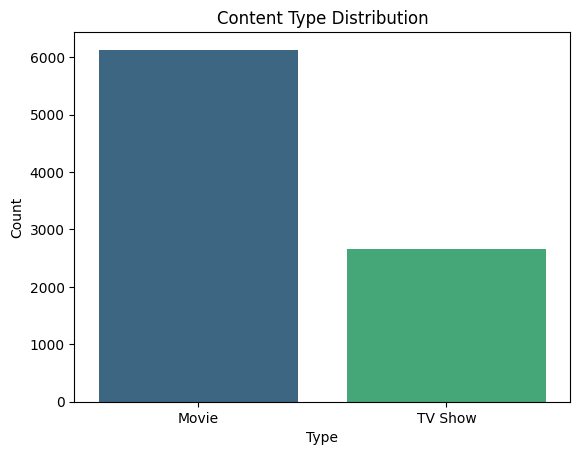

In [13]:
type_counts = df['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

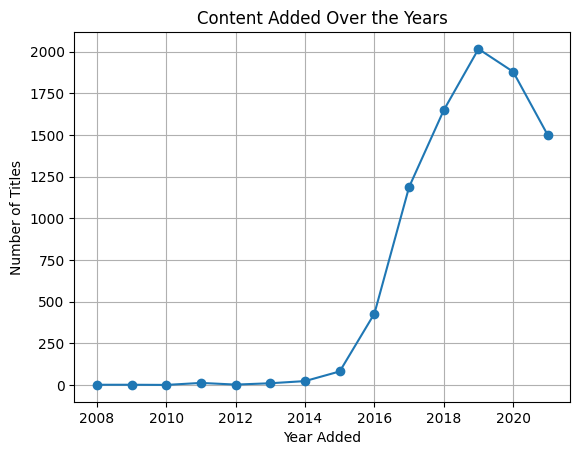

In [15]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
content_trend = df['year_added'].value_counts().sort_index()
plt.plot(content_trend.index, content_trend.values, marker='o')
plt.title('Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

<ipython-input-16-bdfce749053b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='coolwarm')


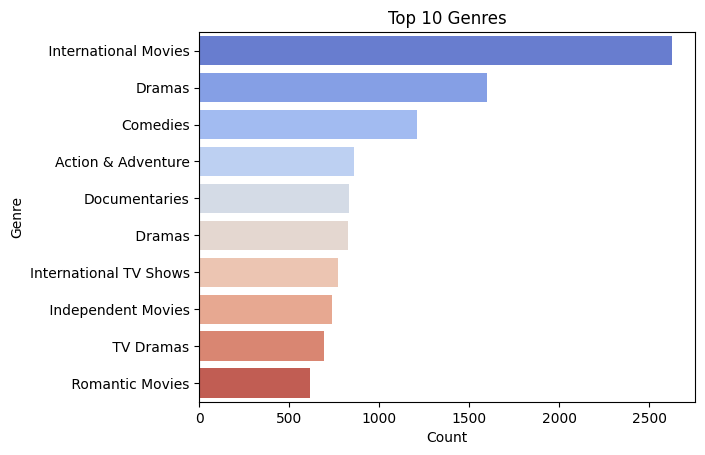

In [16]:
from collections import Counter
genres = Counter(','.join(df['listed_in'].dropna()).split(','))
top_genres = pd.DataFrame(genres.most_common(10), columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=top_genres, palette='coolwarm')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<ipython-input-17-0b814e32f73d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')


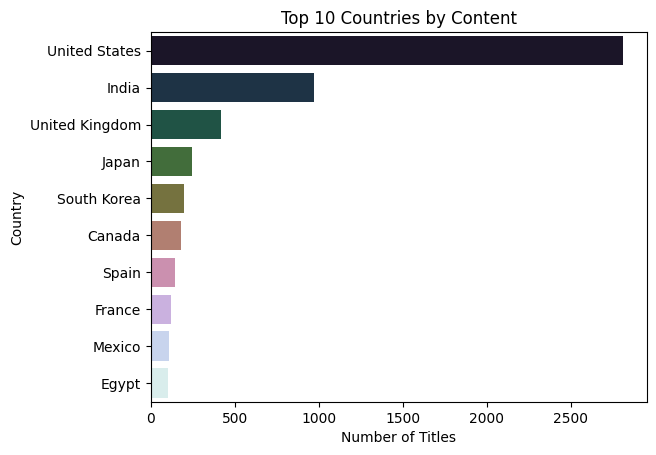

In [17]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='cubehelix')
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

<ipython-input-18-59b7b643c9e9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rocket')


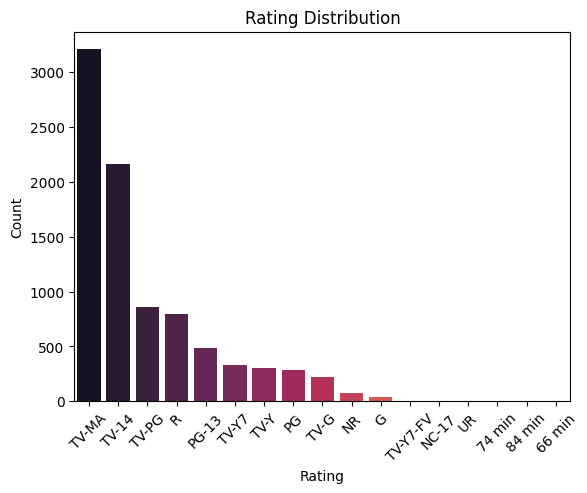

In [18]:
rating_counts = df['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rocket')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-19-b7deb7d76cf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)


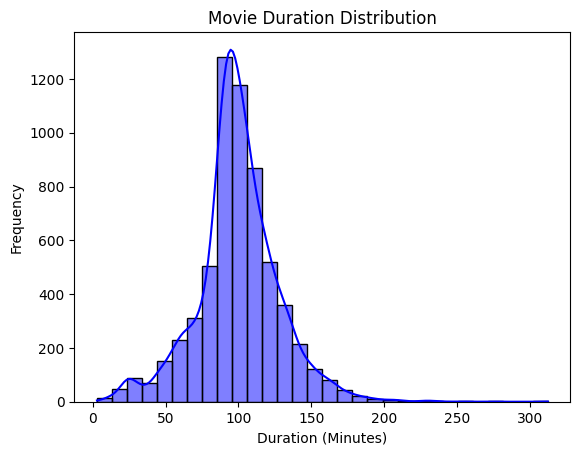

In [19]:
df_movies = df[df['type'] == 'Movie']
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)
sns.histplot(df_movies['duration'], bins=30, kde=True, color='blue')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-80049ebd4859>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_shows, x='duration', palette='muted')


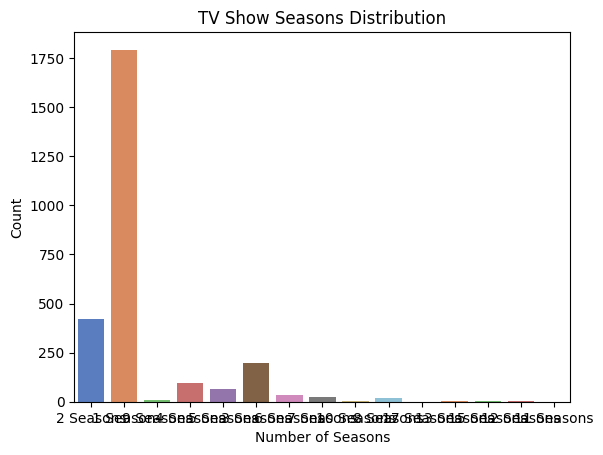

In [20]:
df_shows = df[df['type'] == 'TV Show']
sns.countplot(data=df_shows, x='duration', palette='muted')
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

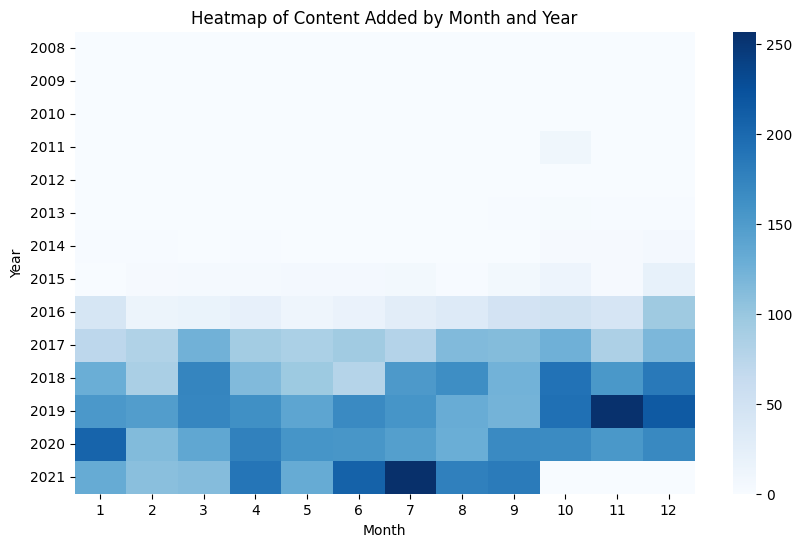

In [21]:
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
month_year = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(month_year, cmap='Blues', annot=False, cbar=True)
plt.title('Heatmap of Content Added by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [22]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [24]:
import dash
from dash import dcc, html
import plotly.express as px  # Importing Plotly Express
import pandas as pd

# Sample DataFrame (replace with your actual data)
df = pd.DataFrame({
    'type': ['Movie', 'TV Show', 'Movie', 'Movie', 'TV Show'],
    'year_added': [2020, 2019, 2021, 2020, 2018],
})

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    dcc.Graph(figure=px.pie(df, names='type', title='Content Type Distribution')),
    dcc.Graph(figure=px.bar(df, x='year_added', title='Content Added Over the Years', color='type')),
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [25]:
plt.savefig('filename.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>